<a href="https://colab.research.google.com/github/zelal-Eizaldeen/movie-recommender-system/blob/main/project4_3113_zelalae2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project4: Building a Movie Recommender System**

#**Team Members**
Zilal Eiz Aldin (Online MCS) Zelalae2@illinois.edu

Mesay Taye (Online MCS) mesayst2@illinois.edu

Jianci Zhai (Online MCS) jianciz2@illinois.edu

#**Contribution of each member**
- **Jianci**: Built (System II: Recommendation Based on IBCF), Genberated Similarity Matrix, Tested the IBCF function.

- **Messay**: Bublished the Frontend and the Backend using Docker.

- **Zilal**: Built System 1 (Recommendation Based on Popularity), used Dash to display top 10 movies, Published the System 1 using Render and Reported the System 1 on the Python Notebook.

##Resources
- Python https://liangfgithub.github.io/Python_W13_Movie_RS.html
- EDA https://liangfgithub.github.io/Python_W13_Movie_RS.html

In [1]:
#from google.colab import drive
#drive.mount("/content/drive")

In [2]:
import pandas as pd
import numpy as np

import os
from IPython.display import Image, display

In [3]:
# Please insert your path for the Dataset and ImagesOfMovies
# DATA_DIR="/content/drive/MyDrive/MastersDegree/CS598 PSL/Assignments/Projects/project4/Dataset/ml-1m"
DATA_DIR="./ml-1m"


In [4]:
# Please insert your path for the Images
# POSTER_URL="/content/drive/MyDrive/MastersDegree/CS598 PSL/Assignments/Projects/project4/Solution/Notebook/assets"
POSTER_URL="./MovieImages"

#**Loading the data**

In [5]:

ratings = pd.read_csv(f'{DATA_DIR}/ratings.dat', sep='::', engine = 'python', header=None)
ratings.columns = ['UserID', 'MovieID', 'Rating', 'Timestamp']
movies = pd.read_csv(f'{DATA_DIR}/movies.dat', sep='::', engine = 'python',
                     encoding="ISO-8859-1", header = None)
movies.columns = ['MovieID', 'Title', 'Genres']


In [6]:
users = pd.read_csv(f'{DATA_DIR}/users.dat', sep='::', engine = 'python', header=None)
users.columns = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']

In [7]:
# Add The images
movies['PosterURL'] = movies['MovieID'].apply(lambda x: f"{POSTER_URL}/{x}.jpg")

In [8]:
movies

,MovieID,Title,Genres,PosterURL
0,1,Toy Story (1995),Animation|Children's|Comedy,./MovieImages/1.jpg
1,2,Jumanji (1995),Adventure|Children's|Fantasy,./MovieImages/2.jpg
2,3,Grumpier Old Men (1995),Comedy|Romance,./MovieImages/3.jpg
3,4,Waiting to Exhale (1995),Comedy|Drama,./MovieImages/4.jpg
4,5,Father of the Bride Part II (1995),Comedy,./MovieImages/5.jpg
...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,./MovieImages/3948.jpg
3879,3949,Requiem for a Dream (2000),Drama,./MovieImages/3949.jpg
3880,3950,Tigerland (2000),Drama,./MovieImages/3950.jpg
3881,3951,Two Family House (2000),Drama,./MovieImages/3951.jpg


#**EDA**
Explore the relationship between movie ratings and movie genres. First,
simplify movie genres: multiple genres to ‘Multiple’.

In [9]:
multiple_idx = pd.Series([("|" in movie) for movie in movies['Genres']])
movies.loc[multiple_idx, 'Genres'] = 'Multiple'

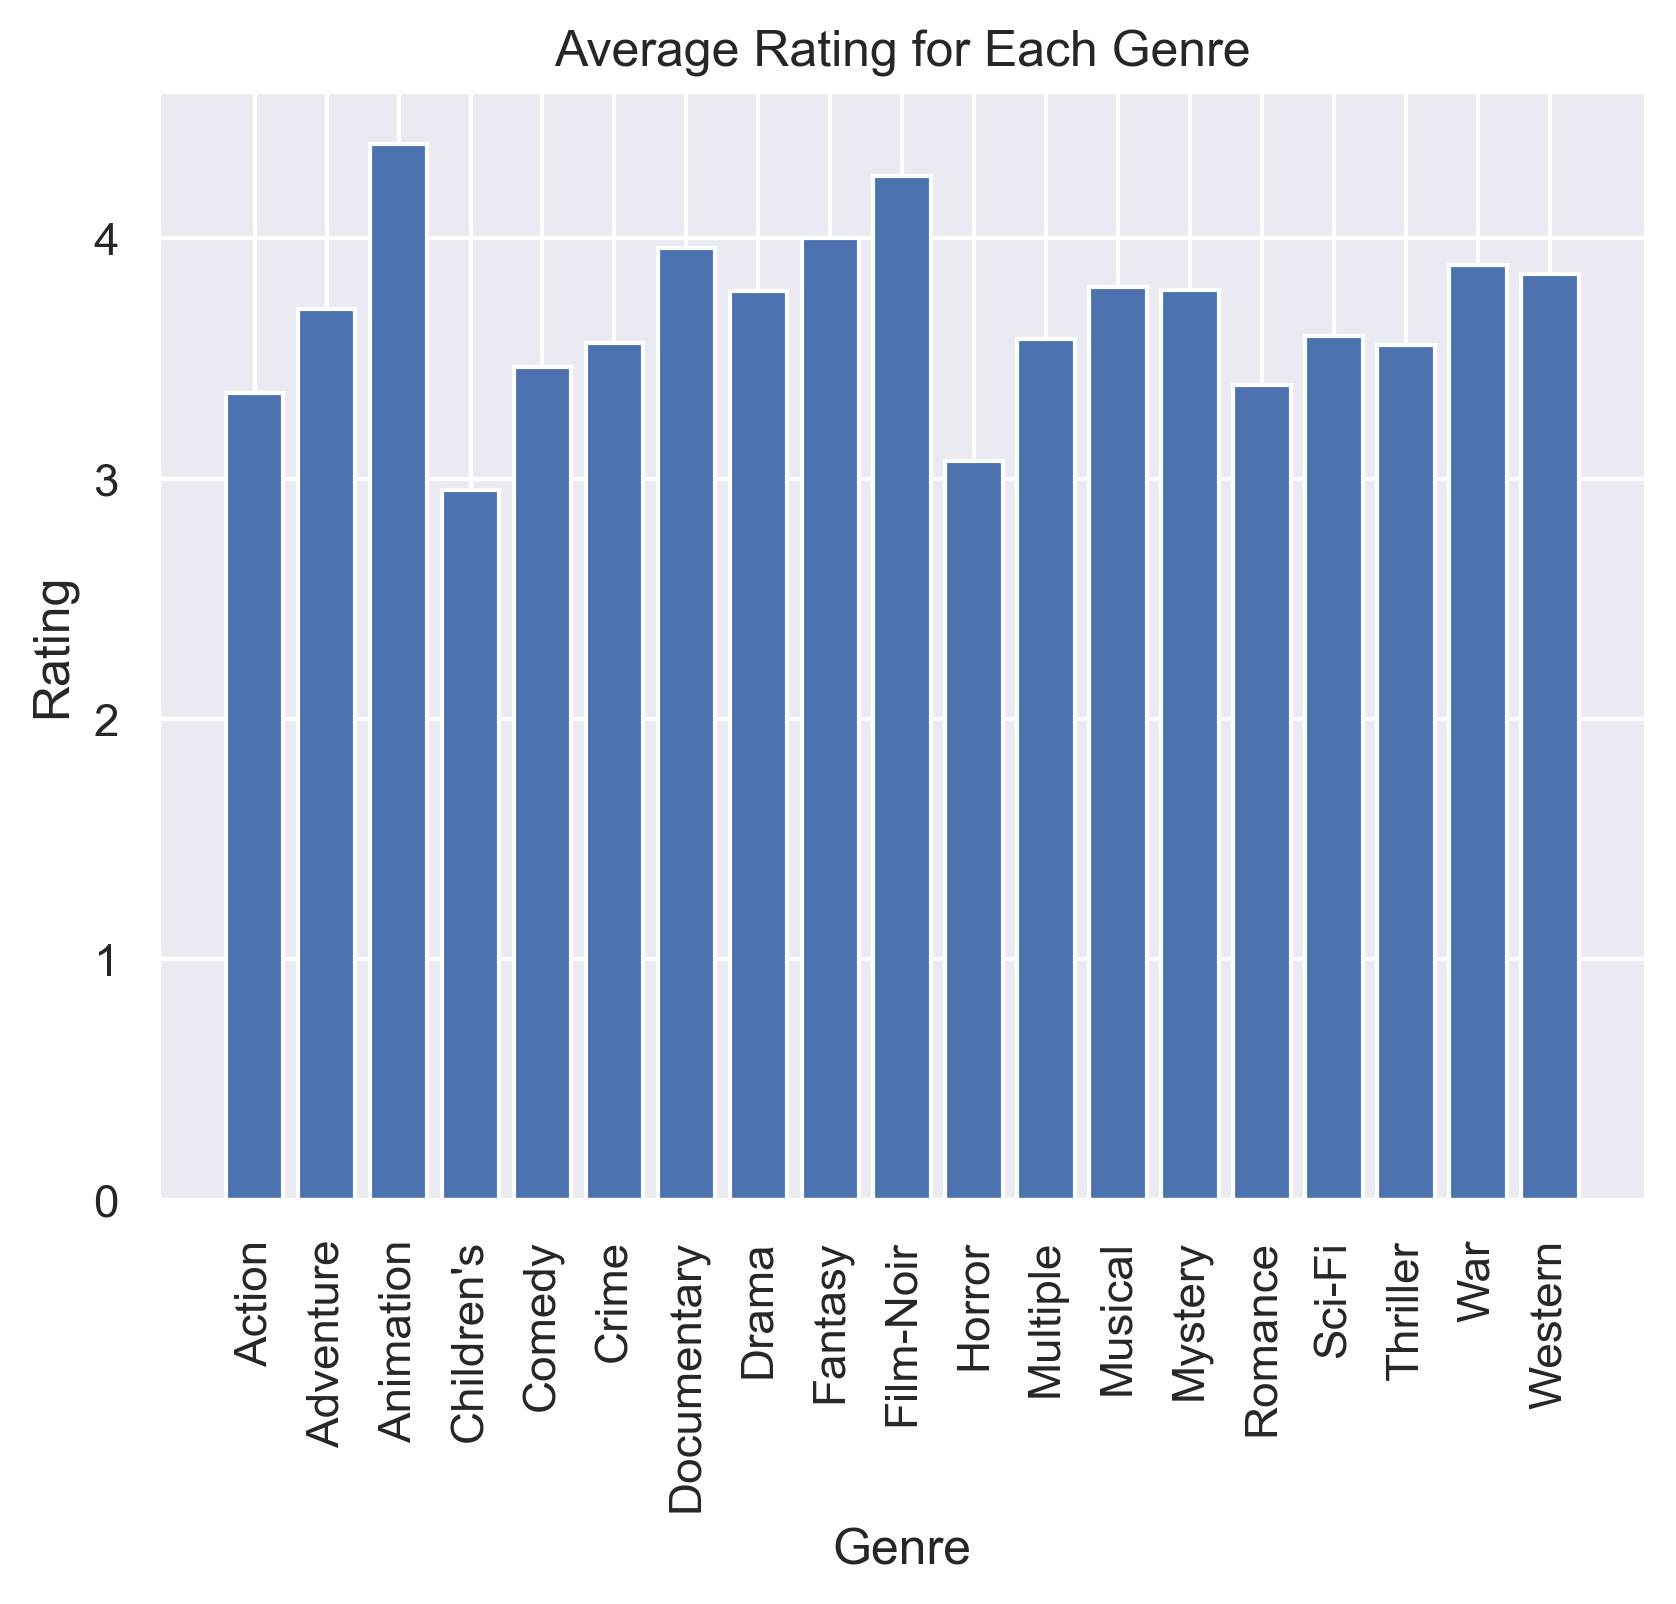

In [10]:
# Merge ratings and movie datasets.
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['figure.dpi'] = 300
sns.set()

rating_merged = ratings.merge(movies, left_on = 'MovieID', right_on = 'MovieID')
mean_ratings = rating_merged[['Rating', 'Genres']].groupby('Genres').mean()

plt.bar(mean_ratings.index, mean_ratings['Rating']);
plt.xticks(rotation=90);
plt.title('Average Rating for Each Genre');
plt.xlabel('Genre');
plt.ylabel('Rating');

#**Build System 1: Recommendation Based on Popularity**

#Compute Popularity Scores
To compute the popularity score for each movie, the following formula is used:

**Popularity Score=(Number of Ratings)×(Normalized Average Rating)**  Where:

- Normalized Average Rating: the average rating is normalized to a 0-1 scale (e.g., a rating scale from 1 to 5).
- Number of Ratings: This is the count of how many ratings a movie has received.

In [11]:
# Compute popularity scores with memory optimizations
rating_merged = ratings.merge(movies[['MovieID', 'Title']], on='MovieID')
movie_stats = rating_merged.groupby('MovieID').agg(
    num_ratings=('Rating', 'count'),
    avg_rating=('Rating', 'mean')
).reset_index()

In [12]:
movie_stats['normalized_rating'] = (movie_stats['avg_rating'] - 1) / 4
movie_stats['popularity_score'] = movie_stats['num_ratings'] * movie_stats['normalized_rating']


In [13]:
# Merge with movie titles to get more useful information
movie_popularity = movie_stats.merge(movies[['MovieID', 'Title','PosterURL']], on='MovieID')
# Sort by popularity score and select the top 10 movies
top_10_popular_movies = movie_popularity.sort_values(by='popularity_score', ascending=False).head(10)
# Display the top 10 popular movies
print(top_10_popular_movies[['MovieID', 'Title', 'num_ratings', 'avg_rating', 'popularity_score']])

      MovieID                                              Title  num_ratings  \
2651     2858                             American Beauty (1999)         3428   
253       260          Star Wars: Episode IV - A New Hope (1977)         2991   
1106     1196  Star Wars: Episode V - The Empire Strikes Back...         2990   
1848     2028                         Saving Private Ryan (1998)         2653   
1108     1198                     Raiders of the Lost Ark (1981)         2514   
1120     1210  Star Wars: Episode VI - Return of the Jedi (1983)         2883   
579       593                   Silence of the Lambs, The (1991)         2578   
2374     2571                                 Matrix, The (1999)         2590   
2557     2762                            Sixth Sense, The (1999)         2459   
593       608                                       Fargo (1996)         2513   

      avg_rating  popularity_score  
2651    4.317386           2843.00  
253     4.453694           2582.50

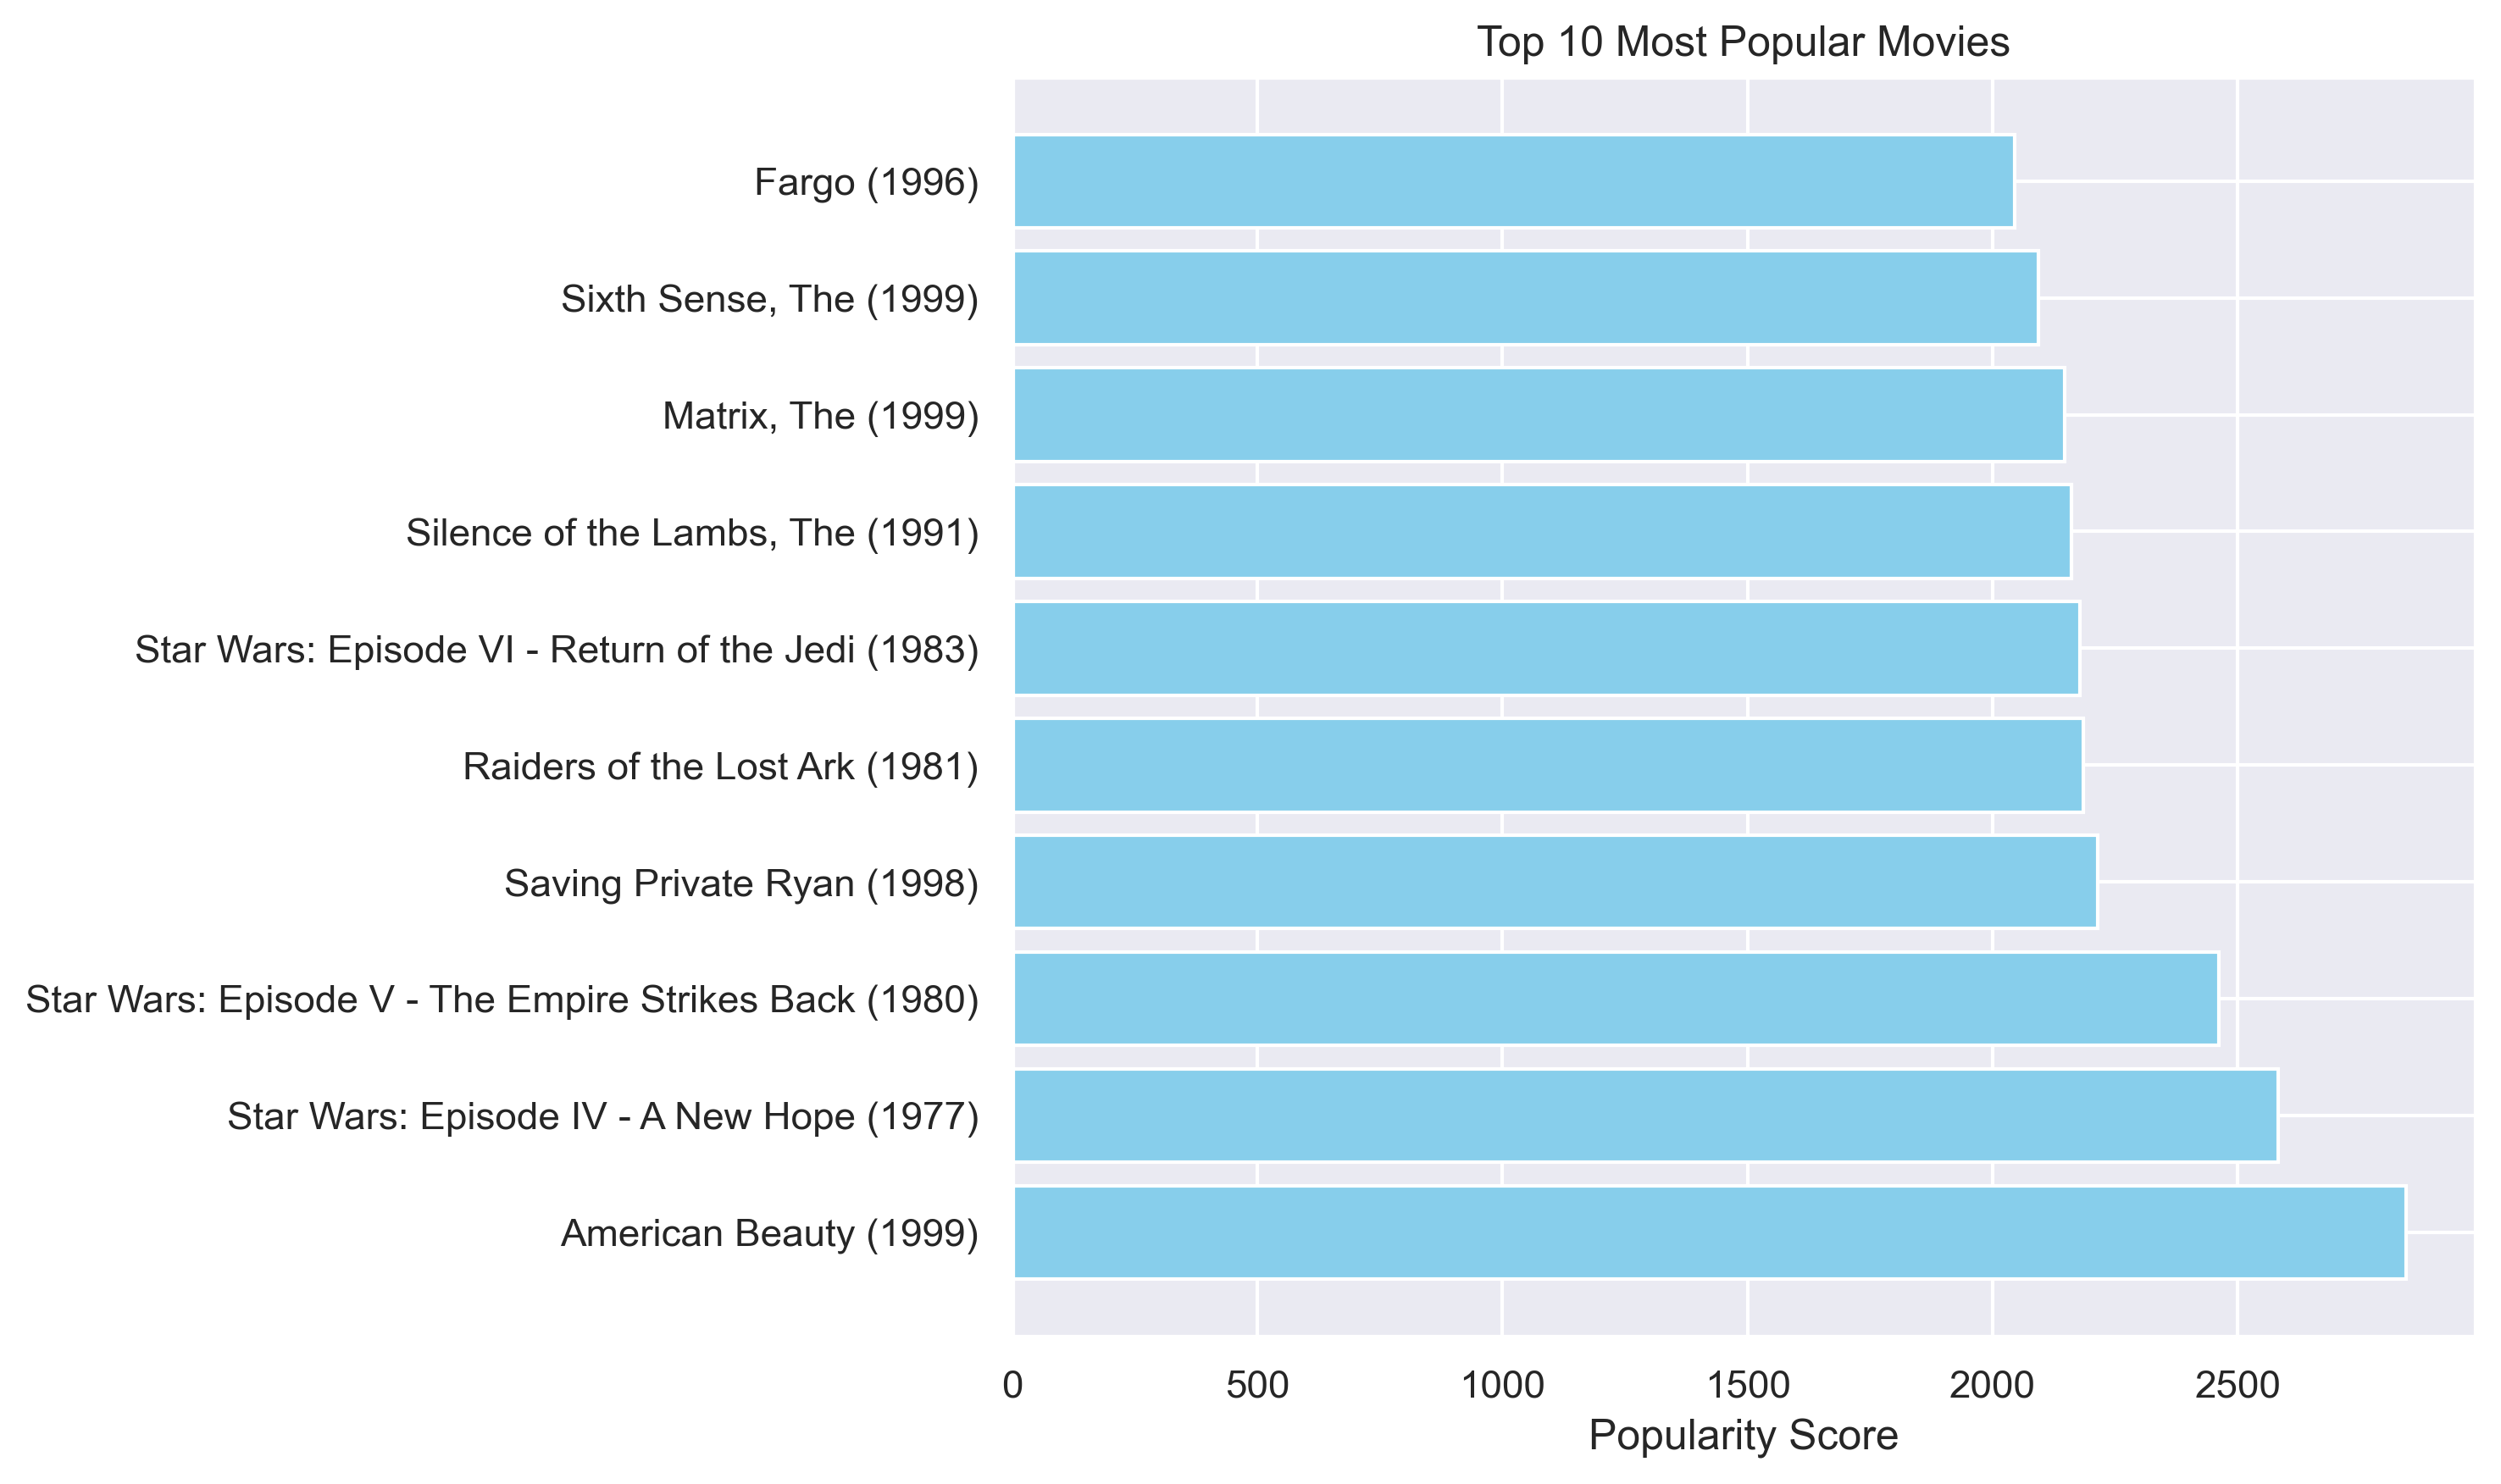

In [14]:
# Visualize the Top 10 Popular Movies
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top_10_popular_movies['Title'], top_10_popular_movies['popularity_score'], color='skyblue')
ax.set_xlabel('Popularity Score')
ax.set_title('Top 10 Most Popular Movies')
plt.tight_layout()
plt.show()

MovieID: 2858.00
Title: American Beauty (1999)


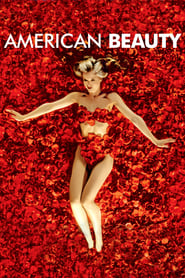



MovieID: 260.00
Title: Star Wars: Episode IV - A New Hope (1977)


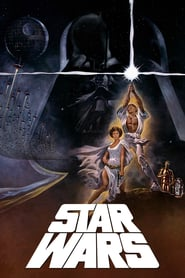



MovieID: 1196.00
Title: Star Wars: Episode V - The Empire Strikes Back (1980)


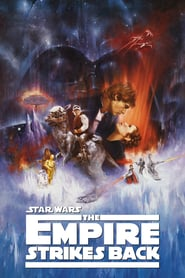



MovieID: 2028.00
Title: Saving Private Ryan (1998)


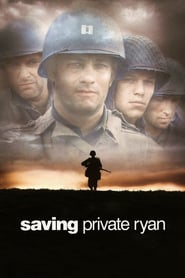



MovieID: 1198.00
Title: Raiders of the Lost Ark (1981)


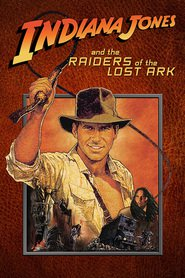



MovieID: 1210.00
Title: Star Wars: Episode VI - Return of the Jedi (1983)


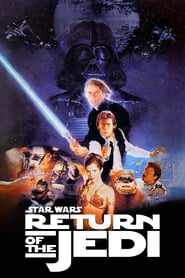



MovieID: 593.00
Title: Silence of the Lambs, The (1991)


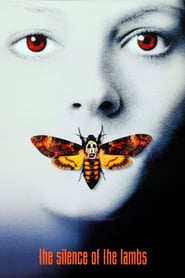



MovieID: 2571.00
Title: Matrix, The (1999)


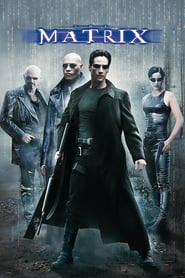



MovieID: 2762.00
Title: Sixth Sense, The (1999)


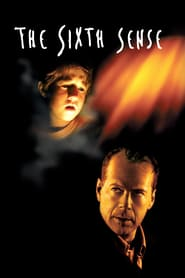



MovieID: 608.00
Title: Fargo (1996)


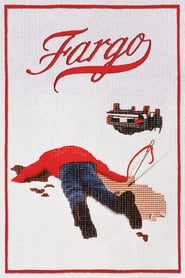

In [15]:
# Display movies with poster images in Google Colab
for index, row in top_10_popular_movies.iterrows():
    movie_id = row['MovieID']
    movie_title = row['Title']

    # Construct the image path based on movieId (e.g., movieId.jpg)
    image_path = os.path.join(POSTER_URL, f"{movie_id}.jpg")  # Adjust file extension if needed

    #Display MovieID
    print(f"MovieID: {movie_id:.2f}")
    # Display the movie title, rating, and image
    print(f"Title: {movie_title}")

    if os.path.exists(image_path):
        display(Image(image_path, width=200, height=300))  # Display movie poster
    else:
        print("No image found!")

    print("\n" + "="*50 + "\n")

**System II: Recommendation Based on IBCF**

denote the 6040-by-3706 rating matrix

In [16]:
ratings

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [17]:
rating_matrix = ratings.pivot(index='UserID', columns='MovieID', values='Rating')
rating_matrix.shape

(6040, 3706)

In [18]:
pd.DataFrame(rating_matrix.iloc[17,:])

,18
MovieID,
1,4.0
2,2.0
3,NaN
4,NaN
5,NaN
...,...
3948,NaN
3949,NaN
3950,NaN


Normalize the rating matrix by centering each row. Row means should be computed based on non-NA entries

In [19]:
pd.DataFrame(rating_matrix.mean(axis=1,skipna=True))

,0
UserID,
1,4.188679
2,3.713178
3,3.901961
4,4.190476
5,3.146465
...,...
6036,3.302928
6037,3.717822
6038,3.800000


In [20]:
rating_matrix_norm = rating_matrix.sub(rating_matrix.mean(axis=1,skipna=True), axis=0)
rating_matrix_norm

MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
UserID,,,,,,,,,,,,,,,,,,,,,
1,0.811321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,-1.146465,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,NaN,NaN,NaN,-1.302928,NaN,-0.302928,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#get a list of all movie id and user id
itemID_lst = rating_matrix.columns
userID_lst = rating_matrix.index

Let S denote the 3706-by-3706 similarity matrix

In [22]:
s_matrix = np.zeros((len(itemID_lst), len(itemID_lst)))
np.fill_diagonal(s_matrix, np.nan)
s_matrix.shape

(3706, 3706)

In [23]:
total_count = len(itemID_lst)*len(itemID_lst)
print(f"total_count = {total_count}")

total_count = 13734436


In [24]:
from datetime import datetime
import os

try:
  #s_matrix_new = pd.read_csv(f'{DATA_DIR}/s_matrix.csv')
  # Directory where chunks are saved
  chunk_directory = f'{DATA_DIR}/'  # Adjust to the path where your chunks are stored

  # Get a sorted list of chunk files (if named sequentially like output_chunk_0.csv, output_chunk_1.csv, etc.)
  chunk_files = sorted([file for file in os.listdir(chunk_directory) if file.startswith('s_matrix_chunk_') and file.endswith('.csv')])

  # Combine chunks
  s_matrix_new = pd.concat([pd.read_csv(os.path.join(chunk_directory, file)) for file in chunk_files])
  # Drop the first column
  s_matrix_new = s_matrix_new.drop(s_matrix_new.columns[0], axis=1)

  print('S Matrix has been created- skip creating S matrix')

except:

  # Start time (past)
  start_time = datetime.now()
  print(f'Start Time:{start_time}')

  # Current time

  count = 0
  for i, movie_i in enumerate(itemID_lst):
    for j, movie_j in enumerate(itemID_lst):
      count += 1
      if count % 50000 == 0:
        current_time = datetime.now()
        print(f"count = {count} at time = {current_time}")
      if s_matrix[i,j] != 0 or np.isnan(s_matrix[i,j]) :
        continue
      temp_matrix = rating_matrix_norm.loc[:,[movie_i,movie_j]]
      temp_matrix = temp_matrix.dropna()
      if (len(temp_matrix) < 3) or (i==j):
        s_matrix[i,j] = np.nan
      else:
        rli_rlj = (temp_matrix.iloc[:,0]*temp_matrix.iloc[:,1]).sum()
        rli_rli = ((temp_matrix.iloc[:,0]**2).sum())**0.5
        rlj_rlj = ((temp_matrix.iloc[:,1]**2).sum())**0.5

        if rli_rli == 0 or rlj_rlj == 0:
          s_matrix[i,j] = np.nan
          s_matrix[j,i] = np.nan
        else:
          s_matrix[i,j] =0.5+0.5*(rli_rlj/(rli_rli*rlj_rlj))
          s_matrix[j,i] =0.5+0.5*(rli_rlj/(rli_rli*rlj_rlj))

    
    # Load the large CSV
    file_path = f'{DATA_DIR}/s_matrix.csv'
    chunk_size = 250000  # Adjust based on testing (number of rows)
    
    # Create chunks
    for i, chunk in enumerate(pd.read_csv(f'{DATA_DIR}/s_matrix.csv', chunksize=450)):
        chunk.to_csv(f'{DATA_DIR}/s_matrix_chunk_{i}.csv', index=False)

S Matrix has been created- skip creating S matrix


Let S denote the 3706-by-3706 similarity matrix computed in previous step. For each row, sort the
non-NA similarity measures and keep the top 30, setting the rest to NA.

In [25]:
pd.set_option('display.precision',20)

In [26]:
s_matrix_new.columns =  ['m' + str(item) for item in itemID_lst.tolist()]
s_matrix_new.index = ['m' + str(item) for item in itemID_lst.tolist()]

In [27]:
s_matrix_new

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,...,m3943,m3944,m3945,m3946,m3947,m3948,m3949,m3950,m3951,m3952
m1,NaN,0.44263583577978937722,0.41076555230911898642,0.40401975809261192474,0.36245661538392487389,0.57916815532198628880,0.47525691532415420548,0.30337850068366928324,0.18896631391811299916,0.51210553380468071261,...,0.38183440523286060753,0.08948849018204489691,0.22780283984240870532,0.27000413335118128577,0.64977324675176806323,0.54812229569318682287,0.70297240194386367840,0.55523132645631689819,0.70310904992070666353,0.60086896336810236008
m2,0.44263583577978937722,NaN,0.54674291417614284683,0.46049467590433862396,0.64800181617864738293,0.41201412944364801394,0.57148817038778199073,0.48868595814055731941,0.68961892541583835747,0.54150370122681457108,...,0.39842058516930839440,NaN,0.44140569802782469999,0.68541983551343910186,0.26145374577491581336,0.55391032398327455510,0.32346037529867699423,0.31656322856366758689,0.22341971533718030241,0.42134813674845017495
m3,0.41076555230911898642,0.54674291417614284683,NaN,0.64075615878494029953,0.67738273447422858720,0.43745266321907400053,0.54795977725237920986,0.66940699652367408046,0.58702973597817886819,0.56883451733641743342,...,0.43975590758845300998,0.45823639676174071633,0.38544562414286120955,0.70382523035709732007,0.50365391159628059015,0.52816818146767796627,0.28401538439358209320,0.51597118507940220589,0.49068309151761629883,0.42731565504264901190
m4,0.40401975809261192474,0.46049467590433862396,0.64075615878494029953,NaN,0.71014454542778548962,0.31894337373955372605,0.51308764138662643628,0.63841370360511284776,0.49407821787485839415,0.36914603919160771106,...,0.76408414159287552092,NaN,NaN,0.90750913940829380788,0.34864719567019880619,0.45742820379105292306,0.16876466468518300235,0.62189130516338353427,0.66095360578121942208,0.44942377102579939008
m5,0.36245661538392487389,0.64800181617864738293,0.67738273447422858720,0.71014454542778548962,NaN,0.38894245443485558900,0.58794307327633732463,0.60864233203335993405,0.75843846712911511254,0.50359202136530534233,...,0.13119477339506668834,0.50945808211309051572,0.60169048267729841051,0.85591228488452153478,0.64485217446780584982,0.59016506402759005834,0.23998246101447939793,0.51710438547002168796,NaN,0.34775493585612499148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
m3948,0.54812229569318682287,0.55391032398327455510,0.52816818146767796627,0.45742820379105292306,0.59016506402759005834,0.53448216407417015184,0.47731666006457862395,0.32326074530049392353,0.44127544413756181196,0.57441240174494545556,...,0.46571065922225979294,0.53606741522141332368,0.44853219186224141390,0.51522013582878001259,0.36985914899488608887,NaN,0.49185194876057641844,0.42533273309045882549,0.30733391556646377785,0.50653001661116625609
m3949,0.70297240194386367840,0.32346037529867699423,0.28401538439358209320,0.16876466468518300235,0.23998246101447939793,0.61532888297722909687,0.35539733709943577278,0.11061188871914300058,0.21376671395874749515,0.43986563932375971619,...,0.56311461893776881826,0.30121786653395271616,0.25258037696280238871,0.29524664354785068454,0.65760713610842025378,0.49185194876057641844,NaN,0.59407000092411099690,0.65651611230984574519,0.56623233415197304907
m3950,0.55523132645631689819,0.31656322856366758689,0.51597118507940220589,0.62189130516338353427,0.51710438547002168796,0.41905128860419327275,0.64906287912504945226,0.79677083775702328694,NaN,0.58996907940975662488,...,0.48060752573898640749,0.23365212458670381324,0.02066013542517180016,0.50249449608991614280,0.53281346066030343955,0.42533273309045882549,0.59407000092411099690,NaN,0.66250155663566390185,0.57372784737553605972
m3951,0.70310904992070666353,0.22341971533718030241,0.49068309151761629883,0.66095360578121942208,NaN,0.38057240854045598644,0.67668186924643269897,0.13172896964879859949,NaN,0.02227183867997750005,...,0.42641572608204658668,0.38700715459822720987,0.17339532083415479247,0.39800008547780557633,NaN,0.307333915566463777

Display the pairwise similarity values from the S matrix (you obtained at Step 2) for the following
specified movies: “m1”, “m10”, “m100”, “m1510”, “m260”, “m3212”. Please round the results to
7 decimal places.


In [28]:
#match results from: https://campuswire.com/c/GB46E5679/feed/967
s_matrix_check = s_matrix_new.loc[['m1', 'm10', 'm100', 'm1510', 'm260', 'm3212'],['m1', 'm10', 'm100', 'm1510', 'm260', 'm3212']].round(7)
pd.set_option('display.precision',7)
s_matrix_check

,m1,m10,m100,m1510,m260,m3212
m1,NaN,0.5121055,0.3919999,NaN,0.7411482,NaN
m10,0.5121055,NaN,0.5474583,NaN,0.5343338,NaN
m100,0.3919999,0.5474583,NaN,NaN,0.3296943,NaN
m1510,NaN,NaN,NaN,NaN,NaN,NaN
m260,0.7411482,0.5343338,0.3296943,NaN,NaN,NaN
m3212,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Keep only the largest 30 values per row
def keep_top_n(df, n):
    # Get the top N values per row by masking
    row_thresholds = np.sort(df.values, axis=1)[:, -n]  # Determine the Nth largest value per row
    return df.where(df.ge(row_thresholds, axis=0))      # Keep values >= Nth largest; set others to NaN

s_matrix_top30 = keep_top_n(s_matrix_new.fillna(0), 30)

In [30]:
rating_matrix.index = ['u' + str(item) for item in rating_matrix.index.tolist()]

In [31]:
rating_matrix

MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
u1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
u2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
u3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
u4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
u5,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
u6036,NaN,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
u6037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
u6038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
u6039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Create a function named myIBCF

In [32]:
def myIBCF(newuser, s_matrix_top30):
    """
    Optional docstring explaining the function.
    """
    sigma_s = (s_matrix_top30*np.where(np.isnan(newuser), 0, 1)).sum(axis=1)
    sigma_sw = (s_matrix_top30* newuser).sum(axis=1)
    pred = sigma_sw/sigma_s
    #remove items already rated by the user
    pred[~np.isnan(newuser)] = np.nan
    pred = pred[~np.isnan(pred)]

    pred_top10 = pd.DataFrame(pred.sort_values(ascending=False).head(10))
    pred_top10.columns=['avg_rating']

    if len(pred_top10) < 10:
      movie_popularity.index = ['m' + str(item) for item in movie_popularity['MovieID'].tolist()]
      try:
        non_nan_indices = pred[~np.isnan(newuser)].index.tolist() #list of items that is rated by users
      except:
        non_nan_indices = []
      new_movie_popularity = movie_popularity[~movie_popularity.index.isin(non_nan_indices)] #exclude items rated by users
      pred_top10 = pd.concat([pred_top10[['avg_rating']],new_movie_popularity.sort_values(by='popularity_score', ascending=False).head(10-len(pred_top10))[['avg_rating']]],axis=0)

    return pred_top10

newuser, a 3706-by-1 vector (denoted as w) containing ratings for the 3,706 movies from a new user. for user "u1181," the recommendation list must include movies m3732, m749, and m3899.

In [33]:
u1181_user = rating_matrix.loc['u1181'].to_numpy()
u1181_user

array([ 3.,  1.,  1., ..., nan, nan, nan])

In [34]:
pred_u1181 = myIBCF(u1181_user, s_matrix_top30)
pred_u1181

,avg_rating
m3732,5.0000000
m749,4.5265592
m3899,4.5260660
m3752,4.0000000
m1253,4.0000000
m427,4.0000000
m1235,4.0000000
m249,4.0000000
m1734,4.0000000
m1039,4.0000000


In [35]:
pred_u1181.index.tolist()

['m3732',
 'm749',
 'm3899',
 'm3752',
 'm1253',
 'm427',
 'm1235',
 'm249',
 'm1734',
 'm1039']

A hypothetical user who rates movie “m1613” with 5 and movie “m1755” with 4.

In [36]:
fake_user = pd.DataFrame([[np.nan] * len(rating_matrix.columns)], columns=rating_matrix.columns)
fake_user.columns =  ['m' + str(item) for item in itemID_lst.tolist()]
fake_user.index = ['fake_user']

In [37]:
fake_user['m1613'] = 5
fake_user['m1755'] = 4

In [38]:
fake_user = fake_user.loc['fake_user'].to_numpy()
fake_user

array([nan, nan, nan, ..., nan, nan, nan])

In [39]:
pred_fake = myIBCF(fake_user, s_matrix_top30)
pred_fake


,avg_rating
m3269,5.0
m74,5.0
m1017,5.0
m691,5.0
m2805,5.0
m2,5.0
m2771,5.0
m2750,5.0
m2718,5.0
m2688,5.0


In [40]:
pred_fake.index.tolist()

['m3269',
 'm74',
 'm1017',
 'm691',
 'm2805',
 'm2',
 'm2771',
 'm2750',
 'm2718',
 'm2688']

A hypothetical user who no ratings at all to take a look at using popularity scores defined in system 1

In [41]:
bored_user = pd.DataFrame([[np.nan] * len(rating_matrix.columns)], columns=rating_matrix.columns)
bored_user.columns =  ['m' + str(item) for item in itemID_lst.tolist()]
bored_user.index = ['bored_user']
bored_user = bored_user.loc['bored_user'].to_numpy()

pred_bored_user = myIBCF(bored_user, s_matrix_top30)
pred_bored_user

,avg_rating
m2858,4.3173862
m260,4.4536944
m1196,4.2929766
m2028,4.3373539
m1198,4.4777247
m1210,4.0228928
m593,4.3518231
m2571,4.3158301
m2762,4.4062627
m608,4.2546757


In [42]:
pred_bored_user.index.tolist()

['m2858',
 'm260',
 'm1196',
 'm2028',
 'm1198',
 'm1210',
 'm593',
 'm2571',
 'm2762',
 'm608']

In [43]:
movie_popularity

,MovieID,num_ratings,avg_rating,normalized_rating,popularity_score,Title,PosterURL
m1,1,2077,4.1468464,0.7867116,1634.00,Toy Story (1995),./MovieImages/1.jpg
m2,2,701,3.2011412,0.5502853,385.75,Jumanji (1995),./MovieImages/2.jpg
m3,3,478,3.0167364,0.5041841,241.00,Grumpier Old Men (1995),./MovieImages/3.jpg
m4,4,170,2.7294118,0.4323529,73.50,Waiting to Exhale (1995),./MovieImages/4.jpg
m5,5,296,3.0067568,0.5016892,148.50,Father of the Bride Part II (1995),./MovieImages/5.jpg
...,...,...,...,...,...,...,...
m3948,3948,862,3.6357309,0.6589327,568.00,Meet the Parents (2000),./MovieImages/3948.jpg
m3949,3949,304,4.1151316,0.7787829,236.75,Requiem for a Dream (2000),./MovieImages/3949.jpg
m3950,3950,54,3.6666667,0.6666667,36.00,Tigerland (2000),./MovieImages/3950.jpg
m3951,3951,40,3.9000000,0.7250000,29.00,Two Family House (2000),./MovieImages/3951.jpg


In [44]:
random_sample = movie_popularity.sort_values(by='popularity_score', ascending=False).head(100).sample(n=10)
random_sample['PosterURL'].tolist()

['./MovieImages/2174.jpg',
 './MovieImages/1214.jpg',
 './MovieImages/111.jpg',
 './MovieImages/2791.jpg',
 './MovieImages/924.jpg',
 './MovieImages/1252.jpg',
 './MovieImages/1036.jpg',
 './MovieImages/593.jpg',
 './MovieImages/1136.jpg',
 './MovieImages/1197.jpg']

#**Link to Live App**


https://p4.fly.dev/

#**Link for The source Code of the Running App**

https://github.com/mesaystaye/p4